In [155]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [250]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [18]:
with open('../results/gcp-kubernetes/e60de088-conda-py3.6-dask-distributed-gcsfs-h5netcdf-h5py-lz4-netcdf4-numpy-pip+dask_kubernetes-pip+h5pyd-pyyaml-rasterio-xarray-zarr.json', 'r') as f:
    gcp_results = json.load(f)

In [204]:
# Tests we have
for key, value in gcp_results['results'].items():
    print(key)

IO_dask.Zarr_GCP_Dask_Compute_10GB.time_mean
IO_dask.Zarr_GCP_write_10GB.time_synthetic_write
IO_numpy.IORead_Random_HDF5_POSIX.time_readtest
IO_numpy.IORead_Random_HSDS.time_readtest
IO_numpy.IORead_Random_Zarr.time_readtest
IO_numpy.IOSelect_LOCA_HSDS.time_readslice
IO_numpy.IOWrite_Random_HDF5_POSIX.time_writetest
IO_numpy.IOWrite_Random_HSDS.time_writetest
IO_numpy.IOWrite_Random_Zarr.time_writetest
IO_xarray.IORead_Zarr.time_synthetic_mean
IO_xarray.IORead_Zarr.time_synthetic_read


In [199]:
for i in gcp_results["results"]:
    print(gcp_results["results"][i])

{'params': [["'GCS'"], ['5', '10', '50'], ['5', '10', '20', '40', '80']], 'result': [14.757084500999918, 9.138491999800317, 7.857594541200524, 3.758808844000305, 3.2435853872004374, None, 8.113536082800419, 4.42086093580001, 2.9286295888006864, 2.3406073931997526, None, 9.607531067999663, 6.7567649915996295, 6.506979541199689, 6.591652244200668]}
{'params': [["'GCS'"], ['5', '10', '50'], ['5', '10', '20', '40', '80']], 'result': [23.482073593400127, None, None, None, 5.176580429800379, 16.823229479200382, 6.859277950999967, 5.422802696400322, 5.1591843182002775, 3.8045372843989753, 5.816385289400932, 3.3557927565998398, 4.946173634400475, 1.9255608681996819, 2.334199986800377]}
0.01505156177
0.260560589
{'params': [["'POSIX'", "'GCS'", "'FUSE'"]], 'result': [0.22415464200000024, 3.6635927630000005, 0.314897395]}
0.031004358399999998
0.021076210400000007
None
{'params': [["'POSIX'", "'GCS'", "'FUSE'"]], 'result': [0.822672407, 4.515673162000001, 1.5028409900000002]}
{'params': [["'POSIX

In [206]:
gcp_results["results"]["IO_dask.Zarr_GCP_Dask_Compute_10GB.time_mean"]

{'params': [["'GCS'"], ['5', '10', '50'], ['5', '10', '20', '40', '80']],
 'result': [14.757084500999918,
  9.138491999800317,
  7.857594541200524,
  3.758808844000305,
  3.2435853872004374,
  None,
  8.113536082800419,
  4.42086093580001,
  2.9286295888006864,
  2.3406073931997526,
  None,
  9.607531067999663,
  6.7567649915996295,
  6.506979541199689,
  6.591652244200668]}

In [282]:
# Something like if test like re("Dask")
# TODO We have to have documented expectation of results format 
test_str = "IO_dask.Zarr_GCP_Dask_Compute_10GB.time_mean"
test_results = gcp_results["results"]["IO_dask.Zarr_GCP_Dask_Compute_10GB.time_mean"]

# Create header
dataframe_str = 'backend,chunks,n_workers,MBytes,time,throughput\n'

# Loop through params and get results in csv form
# Loop through backends
r_ind = 0
for i, backend in enumerate(gcp_results["results"]\
                            ["IO_dask.Zarr_GCP_Dask_Compute_10GB.time_mean"]['params'][0]):
    for j, chunks in enumerate(gcp_results["results"]\
                               ["IO_dask.Zarr_GCP_Dask_Compute_10GB.time_mean"]['params'][1]):
        for k, n_workers in enumerate(gcp_results["results"]\
                            ["IO_dask.Zarr_GCP_Dask_Compute_10GB.time_mean"]['params'][2]):
                this_result = gcp_results["results"]\
                              ["IO_dask.Zarr_GCP_Dask_Compute_10GB.time_mean"]['result'][r_ind]
                # Calculate throughput, if valid
                throughput = np.nan
                if this_result:
                    throughput = np.round(10.0 / this_result, 2)
                dataframe_str += ('%s,%s,%s,10240,%s,%s\n' % (backend.replace('\'', ''), chunks, n_workers, 
                                                              this_result, throughput))
                r_ind += 1

print(dataframe_str)

backend,chunks,n_workers,MBytes,time,throughput
GCS,5,5,10240,14.757084500999918,0.68
GCS,5,10,10240,9.138491999800317,1.09
GCS,5,20,10240,7.857594541200524,1.27
GCS,5,40,10240,3.758808844000305,2.66
GCS,5,80,10240,3.2435853872004374,3.08
GCS,10,5,10240,None,nan
GCS,10,10,10240,8.113536082800419,1.23
GCS,10,20,10240,4.42086093580001,2.26
GCS,10,40,10240,2.9286295888006864,3.41
GCS,10,80,10240,2.3406073931997526,4.27
GCS,50,5,10240,None,nan
GCS,50,10,10240,9.607531067999663,1.04
GCS,50,20,10240,6.7567649915996295,1.48
GCS,50,40,10240,6.506979541199689,1.54
GCS,50,80,10240,6.591652244200668,1.52



In [283]:
DF_HEAD = "backend,chunks,n_workers,MBytes,time,throughput"



TESTDATA = StringIO("""%s
    """ % dataframe_str)


df = pd.read_csv(TESTDATA, sep=",")
df = df.sort_values(['backend', 'chunks', 'n_workers'])
df['config'] = df.backend.str.cat(df.chunks.astype(str), sep='-').str.cat(df.n_workers.astype(str), sep='-')
df

,backend,chunks,n_workers,MBytes,time,throughput,config
0,GCS,5,5,10240,14.757084500999918,0.68,GCS-5-5
1,GCS,5,10,10240,9.138491999800317,1.09,GCS-5-10
2,GCS,5,20,10240,7.857594541200524,1.27,GCS-5-20
3,GCS,5,40,10240,3.758808844000305,2.66,GCS-5-40
4,GCS,5,80,10240,3.2435853872004374,3.08,GCS-5-80
5,GCS,10,5,10240,None,NaN,GCS-10-5
6,GCS,10,10,10240,8.113536082800419,1.23,GCS-10-10
7,GCS,10,20,10240,4.42086093580001,2.26,GCS-10-20
8,GCS,10,40,10240,2.9286295888006864,3.41,GCS-10-40
9,GCS,10,80,10240,2.3406073931997526,4.27,GCS-10-80


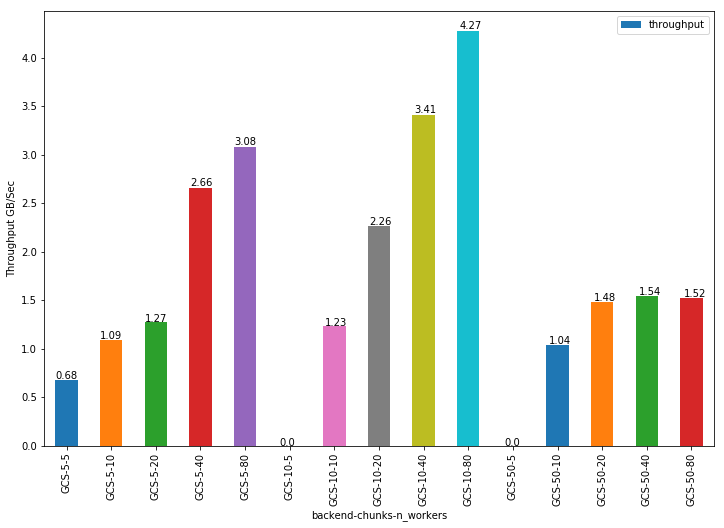

In [286]:
fig_tab = df[['config', 'throughput']]
fig_tab_plot = fig_tab.plot(kind='bar', x='config', y='throughput')
fig_tab_plot.set_xlabel("backend-chunks-n_workers")
fig_tab_plot.set_ylabel("Throughput GB/Sec")

for p in fig_tab_plot.patches:
    fig_tab_plot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))